<a href="https://colab.research.google.com/github/Andres-boullosa/deepLearning/blob/master/Practica_zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


In [2]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS FASHION_MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# 3.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))

In [5]:
train_images = train_images.astype('float32') / 255

In [6]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# 4.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

De esto me falta toquetear la forma


# 1 Construimos y entrenamos los modelos pedidos


In [9]:
# 5.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

In [10]:
# Construimos y entrenamos la network1

network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network1.add(layers.Dense(10, activation='softmax'))

network1.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8003 - accuracy: 0.7405
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.8270
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.8376
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.8469
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8508


In [11]:
# Hacemos lo mismo para la network2

network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8540 - accuracy: 0.7082
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5175 - accuracy: 0.8225
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8378
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.8436
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.8492


In [12]:
# Hacemos la segunda version de la network2

network2_2 = models.Sequential()
network2_2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2_2.add(layers.Dense(10, activation='softmax'))

network2_2.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.8210 - accuracy: 0.7366
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5127 - accuracy: 0.8249
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.8381
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.8461
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8502
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8535
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8565
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8590
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8616
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8617

In [13]:
# Hacemos lo mismo para la network3

network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1482 - accuracy: 0.2891
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8221 - accuracy: 0.5197
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6060 - accuracy: 0.5714
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4535 - accuracy: 0.6098
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3368 - accuracy: 0.6388


In [14]:
# Hacemos lo mismo para la network4

network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))

network4.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4245 - accuracy: 0.6227
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8440 - accuracy: 0.7690
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6411 - accuracy: 0.8037
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.8227
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5031 - accuracy: 0.8332


In [15]:
# Hacemos lo mismo para la network5

network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))

network5.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.0291 - accuracy: 0.6913
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6625 - accuracy: 0.7871
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5844 - accuracy: 0.8101
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5427 - accuracy: 0.8223
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5157 - accuracy: 0.8288


In [16]:
# Hacemos lo mismo para la network6

network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))

network6.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.5576 - accuracy: 0.8015
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3792 - accuracy: 0.8610
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3364 - accuracy: 0.8762
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3105 - accuracy: 0.8860
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2920 - accuracy: 0.8921


In [17]:
# Hacemos lo mismo para la network7

network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))

network7.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.6994 - accuracy: 0.5953
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1252 - accuracy: 0.7125
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.9216 - accuracy: 0.7303
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8211 - accuracy: 0.7423
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7609 - accuracy: 0.7517


In [18]:
# Hacemos la segunda version de la network7

network7_2 = models.Sequential()
network7_2.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7_2.add(layers.Dense(10, activation='softmax'))

network7_2.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 3s 6ms/step - loss: 1.7269 - accuracy: 0.5868
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 1.1376 - accuracy: 0.7115
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.9267 - accuracy: 0.7301
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.8239 - accuracy: 0.7427
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.7623 - accuracy: 0.7526
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.7204 - accuracy: 0.7606
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6895 - accuracy: 0.7670
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6653 - accuracy: 0.7731
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6454 - accuracy: 0.7789
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6284 - accuracy: 0.7833

In [19]:
# Hacemos lo mismo para la network8

network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

network8.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.5899 - accuracy: 0.7934
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4268 - accuracy: 0.8439
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3857 - accuracy: 0.8598
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3584 - accuracy: 0.8693
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3385 - accuracy: 0.8777


# 2 Explicamos la salida de la llamada a summary


In [20]:
network1.summary()
network2_2.summary()
network2_2.summary()
network3.summary()
network4.summary()
network5.summary()
network6.summary()
network7.summary()
network7_2.summary()
network8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
________

Explica aqui el 2

# 3 Analisis concreto de los modelos 2 y 7 frente a sus variantes


# 4 Evaluación de todos los modelos frente a los datos de prueba

In [21]:
test_loss, test_acc = network1.evaluate(test_images, test_labels)
test_loss, test_acc = network2.evaluate(test_images, test_labels)
test_loss, test_acc = network2_2.evaluate(test_images, test_labels)
test_loss, test_acc = network3.evaluate(test_images, test_labels)
test_loss, test_acc = network4.evaluate(test_images, test_labels)
test_loss, test_acc = network5.evaluate(test_images, test_labels)
test_loss, test_acc = network6.evaluate(test_images, test_labels)
test_loss, test_acc = network7_2.evaluate(test_images, test_labels)
test_loss, test_acc = network8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8689


añadir comentario de por que baja la accuaracy


# 5 Predecimos la 6ª imagen de el conjunto de test para todos los modelos



In [22]:
import numpy as np

# Predicción network1
predictions1 = network1.predict(test_images)
print("Prediccion1:",np.argmax(predictions1[5]))

# Predicción network2
predictions2 = network2.predict(test_images)
print("Prediccion2:",np.argmax(predictions2[5]))

# Predicción network2_2
predictions2_2 = network2_2.predict(test_images)
print("Prediccion2_2:",np.argmax(predictions2_2[5]))

# Predicción network3
predictions3 = network3.predict(test_images)
print("Prediccion3:",np.argmax(predictions3[5]))

# Predicción network4
predictions4 = network4.predict(test_images)
print("Prediccion4:",np.argmax(predictions4[5]))

# Predicción network5
predictions5 = network5.predict(test_images)
print("Prediccion5:",np.argmax(predictions5[5]))

# Predicción network6
predictions6 = network6.predict(test_images)
print("Prediccion6:",np.argmax(predictions6[5]))

# Predicción network7
predictions7 = network7.predict(test_images)
print("Prediccion7:",np.argmax(predictions7[5]))

# Predicción network7_2
predictions7_2 = network7_2.predict(test_images)
print("Prediccion7_2:",np.argmax(predictions7_2[5]))

# Predicción network8
predictions8 = network8.predict(test_images)
print("Prediccion8:",np.argmax(predictions8[5]))

# valor real
print("Valor real:",np.argmax(test_labels[5]))

Prediccion1: 1
Prediccion2: 1
Prediccion2_2: 1
Prediccion3: 1
Prediccion4: 1
Prediccion5: 1
Prediccion6: 1
Prediccion7: 1
Prediccion7_2: 1
Prediccion8: 1
Valor real: 1


comentario todos los modelos aciertan ese en concreto


# 6.Graficamos las 10 primeras imagenes de cada conjunto de test


In [23]:
# Funciones necesarias para graficación
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Modelo 1


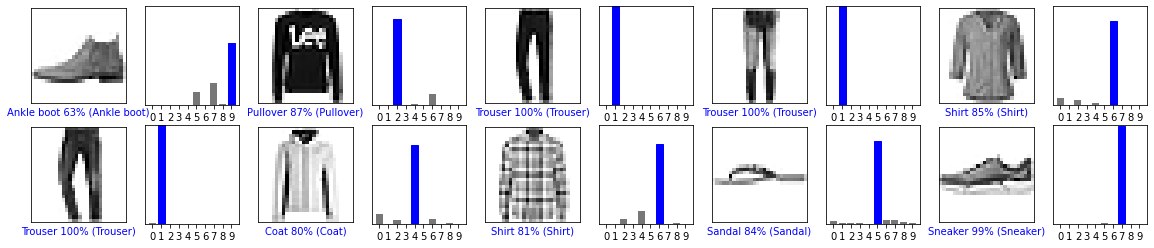

Modelo 2


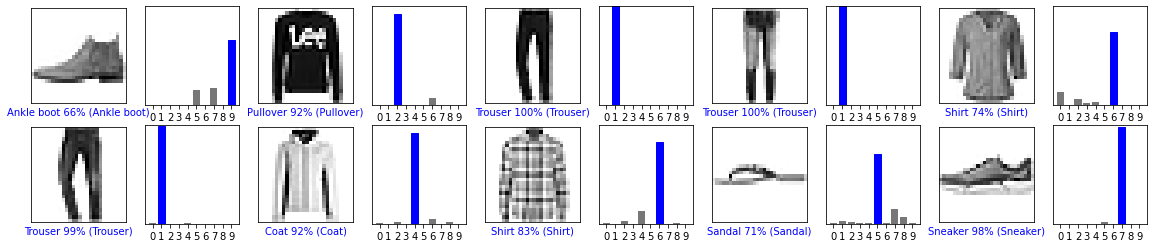

Modelo 2_2


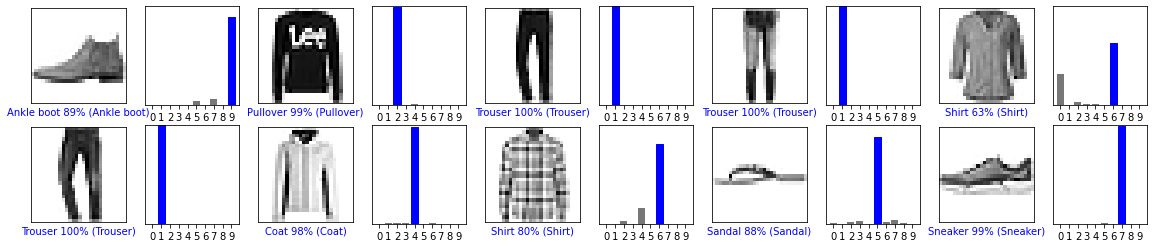

Modelo 3


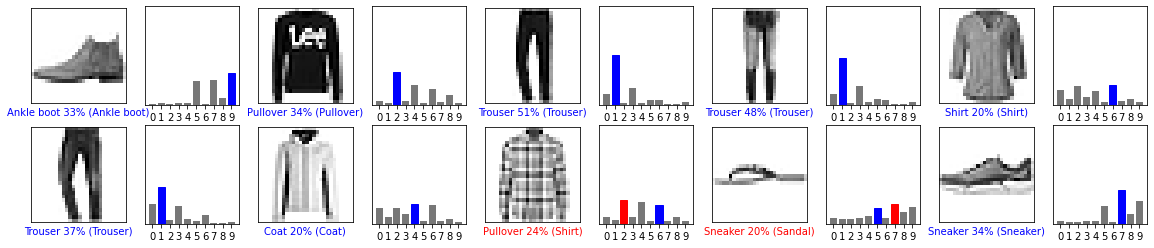

Modelo 4


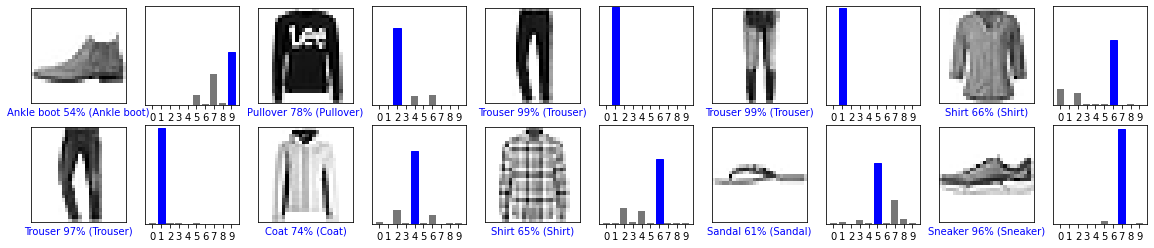

Modelo 5


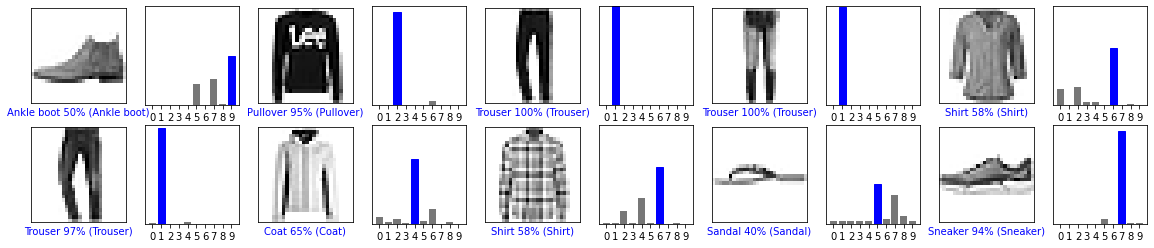

Modelo 6


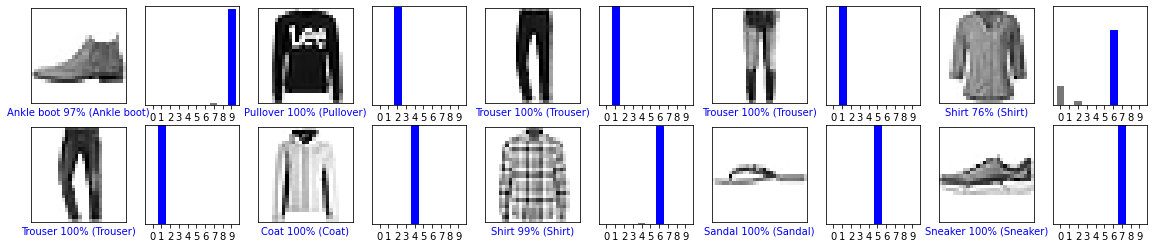

Modelo 7


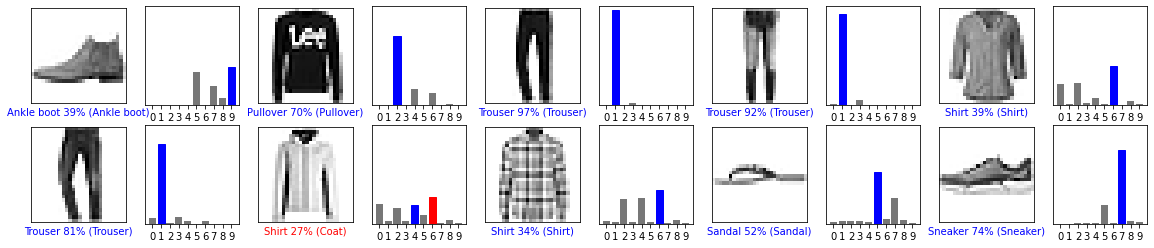

Modelo 7_2


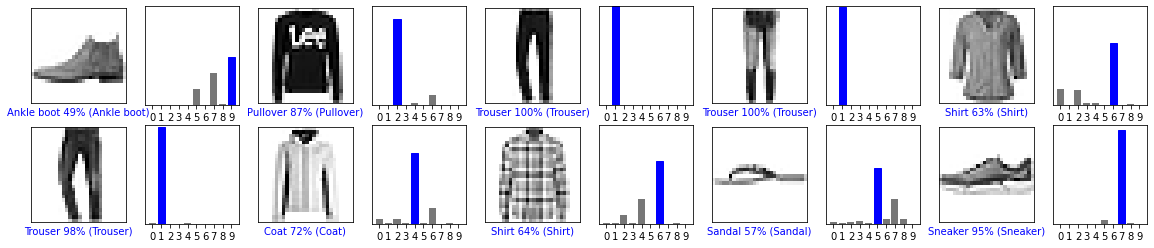

Modelo 8


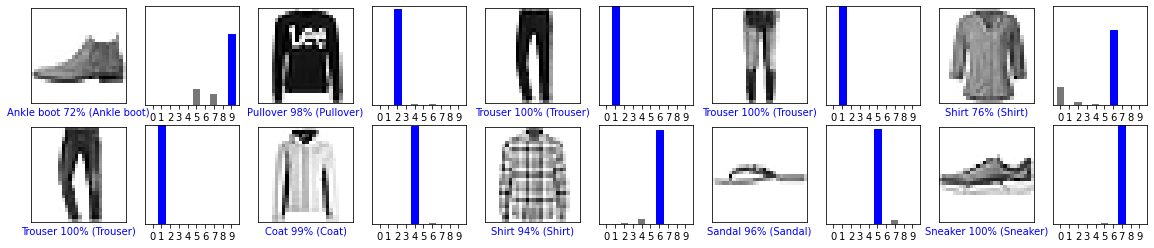

In [29]:
# Graficamos el comportamiento de los modelos

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
train_images = test_images.astype('float32') / 255

# Graficamos el comportamiento del modelo 1
print("Modelo 1")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions1, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2
print("Modelo 2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2_2
print("Modelo 2_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 3
print("Modelo 3")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions3, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions3, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 4
print("Modelo 4")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions4, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions4, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 5
print("Modelo 5")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions5, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions5, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 6
print("Modelo 6")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions6, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions6, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7
print("Modelo 7")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7_2
print("Modelo 7_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 8
print("Modelo 8")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions8, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions8, test_labels)
plt.show()

Reflexion resultados

# 7. Mejora de el modelo


In [32]:
# Hacemos lo mismo para la network8

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network9 = models.Sequential()
network9.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
network9.add(layers.Dense(10, activation='softmax'))
network9.summary()

network9.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

network9.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network9.evaluate(test_images, test_labels)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.8088
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8573
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8687
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8792
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8689


Explicacion de optimizador y funcion de perdida
Reflexiones respecto al resultado